# Homework 2- Question 3: Museum site planning 

A site is being investigated as a potential location for a new
museum. An aerial plan of the site is shown in the figure below (in feet). The museum will have a
circular footprint and law mandates that there be at least 50 feet of clearance between the building
and any road. If we want the largest possible museum, where should it be located? What is its optimal
radius? Re-plot the figure below along with the optimally designed museum.

Equations for lines enclosing the museum site are as follows

- $ y \le 500 $
- $ 3y + 2x \le 2100 $
- $ 3x -y \le 1500 $
- $ x \ge 0 $
- $ y \ge 0 $

## Problem Model and Data

The key idea here is to solve the 2D version of problem discussed in class. The radius as found by the model would be reduced by 50 feet, to give us the required clearance from all the roads

In [1]:
A = [0  1; 2 3; 3 -1; -1 0; 0 -1];
b = [500; 2100; 1500; 0; 0]

using JuMP

m = Model()
@variable(m, r >= 0)           # radius
@variable(m, x[1:2])           # coordinates of center
for i = 1:size(A,1)
    @constraint(m, A[i,:]'*x + r*norm(A[i,:]) .<= b[i])
end
@objective(m, Max, r)     # maximize radius

status = solve(m)
center = getvalue(x)
radius = getvalue(r) - 50

println(status)
println("The coordinates of the Chebyshev center are: ", center)
println("The largest possible radius is: ", radius)

Optimal
The coordinates of the Chebyshev center are: [244.029,244.029]
The largest possible radius is: 194.0285267938019


## Graph showing the roads and museum site outline 

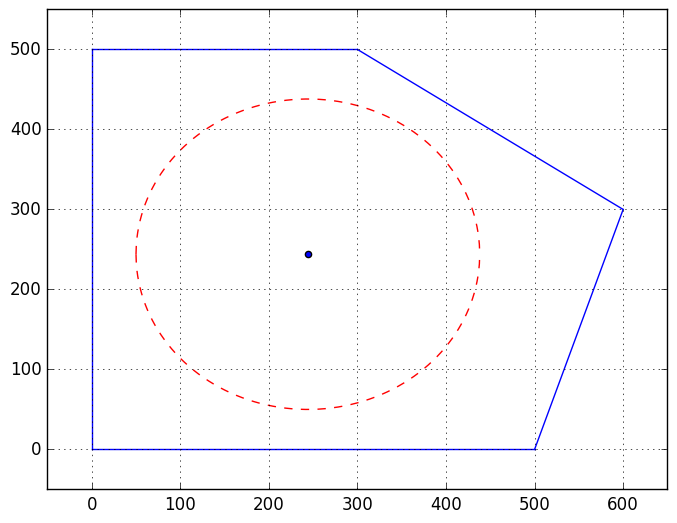

In [2]:
using PyPlot
radius = 244.0285267938019
x0 = linspace(0,500,1000)
x1 = linspace(0,300,1000)
x2 = linspace(500,600,1000)
x3 = linspace(300,600,100)
y1 = 0*x1 + 500
y2 = (-2x3 + 2100)/3
y3 = (3x2 - 1500)
grid("on")
xlim(-50,650)
ylim(-50,550)
radius -= 50
plot(x1, y1, color="blue",linewidth=1.0, linestyle="-")
plot(x2, y3, color="blue",linewidth=1.0, linestyle="-")
plot(x3, y2, color="blue",linewidth=1.0, linestyle="-")
plot(x0, 0*x0, color="blue",linewidth=1.0, linestyle="-")
plot(0*x0, x0, color="blue",linewidth=1.0, linestyle="-")
x = linspace(center[1]-radius, center[1]+radius, 1000)
y_upper = sqrt(abs(radius^2 - (x.-center[1]).^2)) + center[2]
y_lower = -sqrt(abs(radius^2 - (x.-center[1]).^2)) + center[2]
plot(x, y_upper, color="red", linewidth=1.0, linestyle="--")
plot(x, y_lower, color="red", linewidth=1.0, linestyle="--")
scatter(center[1], center[2]);

## Alternative Solution
To confirm that the center or the radius doesn't change if we bring the roads inwards, the following model is contructed by translating all the lines inwards by 50 feet.

In [3]:
Af = [0  1; 2 3; 3 -1; -1 0; 0 -1];
# The projection of 50 feet is taken on the y-axis and is added/subtracted to the y-intercept of the
# original line to give the equation of the new line
bf = [450; (2100-3*(50/cos(pi - atan2(2,-3)))); (1500 - 50/cos(atan2(3,1))); -50; -50]

using JuMP

mf = Model()
@variable(mf, rf >= 0)           # radius
@variable(mf, xf[1:2])           # coordinates of center
for i = 1:size(Af,1)
    @constraint(mf, Af[i,:]'*xf + rf*norm(Af[i,:]) .<= bf[i])
end
@objective(mf, Max, rf)     # maximize radius

status = solve(mf)
center = getvalue(xf)
radius = getvalue(rf)

println(status)
println("The coordinates of the Chebyshev center are: ", center)
println("The largest possible radius is: ", radius)

Optimal
The coordinates of the Chebyshev center are: [244.029,244.029]
The largest possible radius is: 194.02852679380186


The solution shows that both the radius and the location of the center remains exactly same.

## Graph with original roads and clearance boundaries 

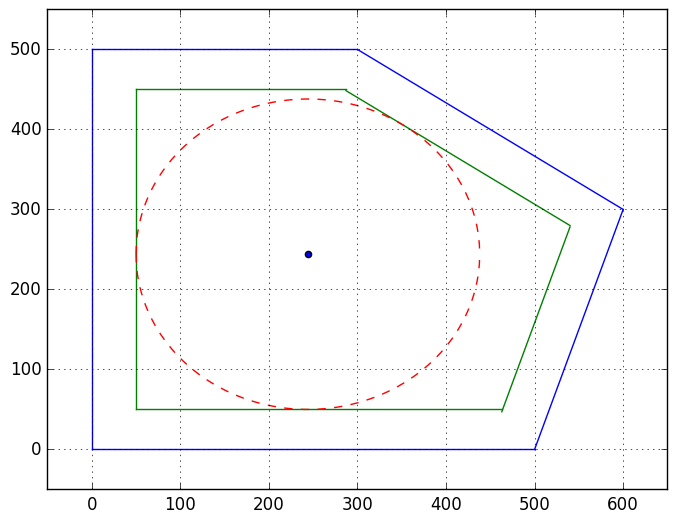

In [4]:
using PyPlot
x0 = linspace(0,500,1000)
x1 = linspace(0,300,1000)
x2 = linspace(500,600,1000)
x3 = linspace(300,600,100)
y1 = 0*x1 + 500
y2 = (-2x3 + 2100)/3
y3 = (3x2 - 1500)
grid("on")
xlim(-50,650)
ylim(-50,550)
plot(x1, y1, color="blue",linewidth=1.0, linestyle="-")
plot(x2, y3, color="blue",linewidth=1.0, linestyle="-")
plot(x3, y2, color="blue",linewidth=1.0, linestyle="-")
plot(x0, 0*x0, color="blue",linewidth=1.0, linestyle="-")
plot(0*x0, x0, color="blue",linewidth=1.0, linestyle="-")

x0f = linspace(50,450,1000)
x0f_2 = linspace(50,463,1000)
x1f = linspace(50,287,1000)
x2f = linspace(463,540,1000)
x3f = linspace(287,540,100)
y1f = 0*x1f + 450
y2f = (-2x3f + (2100 - 3*(50/cos(pi - atan2(2,-3)))))/3
y3f = (3x2f - 1500 + 50/cos(atan2(3,1)))
plot(x1f, y1f, color="green",linewidth=1.0, linestyle="-")
plot(x2f, y3f, color="green",linewidth=1.0, linestyle="-")
plot(x3f, y2f, color="green",linewidth=1.0, linestyle="-")
plot(x0f_2, 0*x0f .+ 50, color="green",linewidth=1.0, linestyle="-")
plot(0*x0f.+50, x0f, color="green",linewidth=1.0, linestyle="-")

x = linspace(center[1]-radius, center[1]+radius, 1000)
y_upper = sqrt(abs(radius^2 - (x.-center[1]).^2)) + center[2]
y_lower = -sqrt(abs(radius^2 - (x.-center[1]).^2)) + center[2]
plot(x, y_upper, color="red", linewidth=1.0, linestyle="--")
plot(x, y_lower, color="red", linewidth=1.0, linestyle="--")
scatter(center[1], center[2]);